<a href="https://colab.research.google.com/github/7Mdk7/first-project/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('teleCust1000t (3).csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [ ]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [ ]:
y=df['custcat'].values

In [ ]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype('float'))
x

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [ ]:
from sklearn.model_selection import train_test_split
x_t,x_ts,y_t,y_ts=train_test_split(x,y ,  test_size=0.3 , random_state=42)
x_t.shape

(700, 11)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean')

# Fit the KNN model using the training data
knn.fit(x_t, y_t)

# Predict the labels for the test data
y_pred = knn.predict(x_ts)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_ts)
print("Accuracy:", accuracy)
print(knn.score(x_ts, y_ts))


Accuracy: 0.3233333333333333
0.3233333333333333


Best k: 5
Accuracy: 0.35


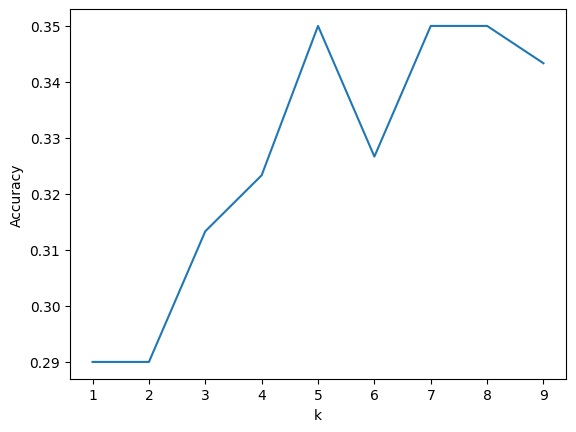

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of possible k values
k_values = np.arange(1, 10)

# Create an empty list to store the accuracies for each k value
accuracies = []

# Loop through each k value
for k in k_values:
    # Define the KNeighborsClassifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')

    # Fit the KNN model using the training data
    knn.fit(x_t, y_t)

    # Predict the labels for the test data
    y_pred = knn.predict(x_ts)

    # Calculate the accuracy of the model
    accuracy = np.mean(y_pred == y_ts)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Find the k value with the highest accuracy
best_k = k_values[np.argmax(accuracies)]

# Print the best k and its corresponding accuracy
print("Best k:", best_k)
print("Accuracy:", accuracies[np.argmax(accuracies)])

# Plot the accuracies for each k value
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# prompt:

import numpy as np
# Calculate the number of correct predictions
correct_predictions = np.sum(y_pred == y_ts)

# Calculate the number of incorrect predictions
incorrect_predictions = np.sum(y_pred != y_ts)

# Print the number of correct and incorrect predictions
print("Number of correct predictions:", correct_predictions)
print("Number of incorrect predictions:", incorrect_predictions)


Number of correct predictions: 103
Number of incorrect predictions: 197
